<a href="https://colab.research.google.com/github/HabeebKasim18/CSA4724-DEEP-LEARNING-192224093/blob/main/CSA4724_Deep_Learning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

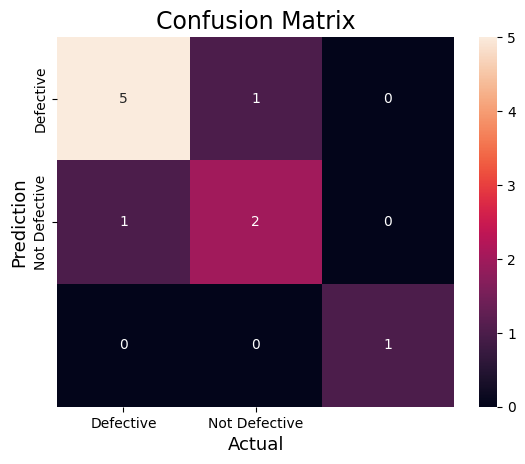

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
actual    = np.array(['Defective','Defective','Defective','Not Defective','Defective','Not Defective','Defective','Defective','Not Defective','Not Defective'])

predicted = np.array(
  ['Defective','Not Defective','Defective','Not Defective','Defective','Defective','Defective','Defective','Not Defective','Not Defective'])

cm = confusion_matrix(actual,predicted)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Defective','Not Defective'],
            yticklabels=['Defective','Not Defective'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


#2

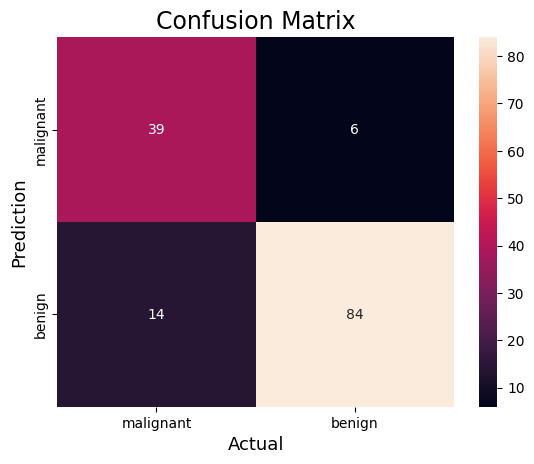

Accuracy   : 0.8601398601398601
Precision : 0.9333333333333333
Recall    : 0.8571428571428571
F1-score  : 0.8936170212765957


In [ ]:
#Import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)


#3

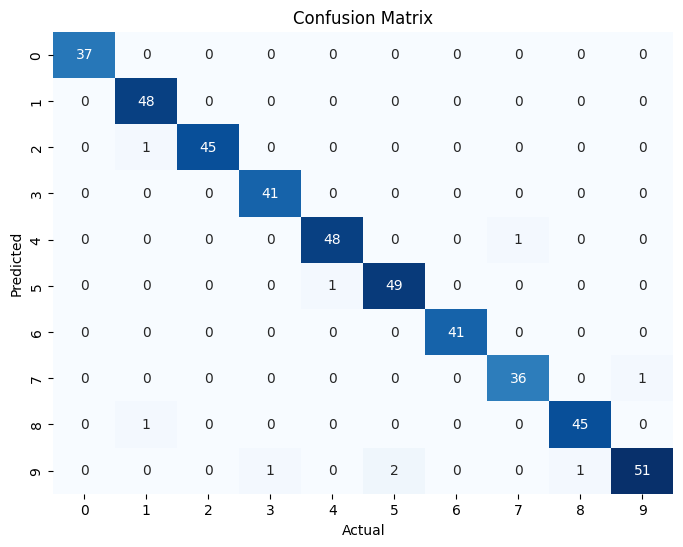

Accuracy:  0.98
Precision: 0.98
Recall:    0.98
F1-score:  0.98


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

# Train the RandomForestClassifier model
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Finding accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:  {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall:    {:.2f}".format(recall))
print("F1-score:  {:.2f}".format(f1))

#4


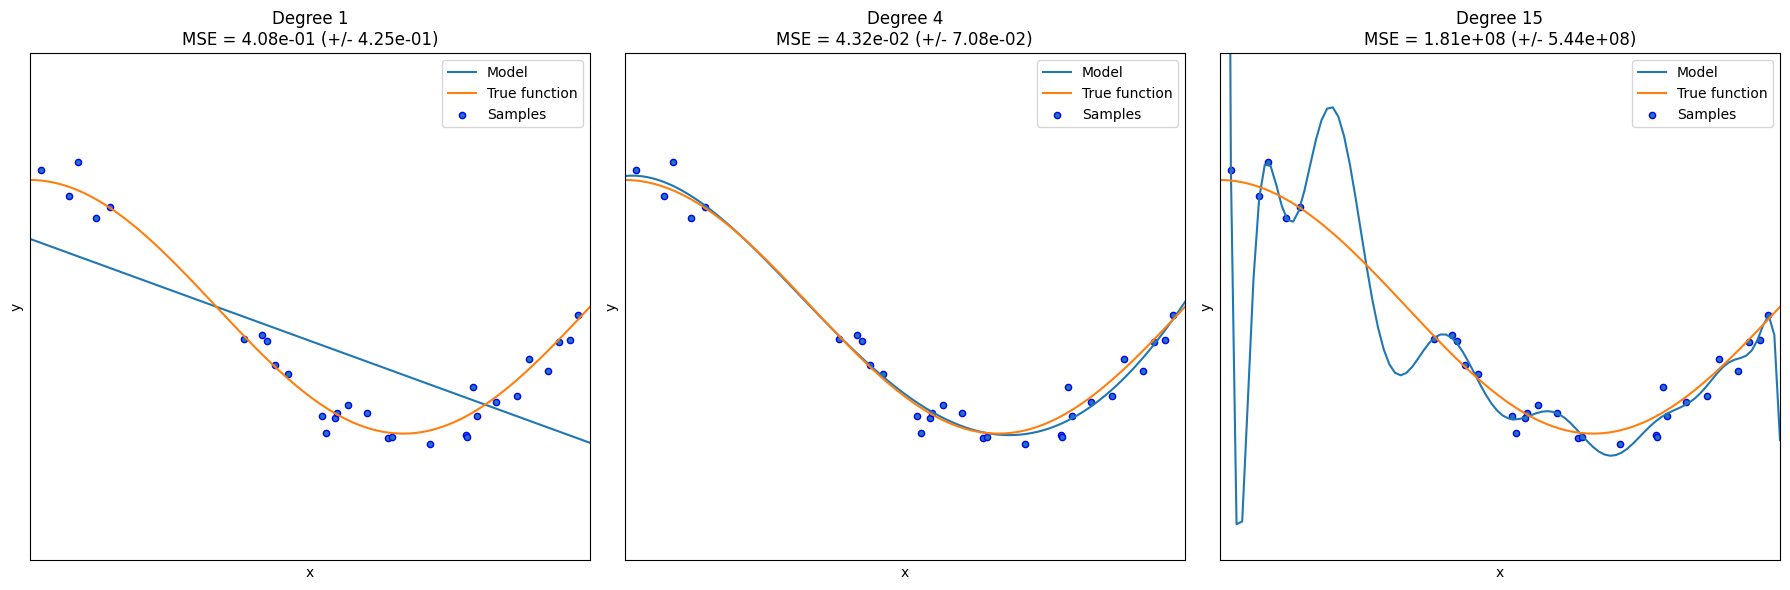

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(18, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = -1 * cross_val_score(pipeline, X[:, np.newaxis], y,
                                  scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE = {scores.mean():.2e} (+/- {scores.std():.2e})")

plt.tight_layout()
plt.show()

#5

Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


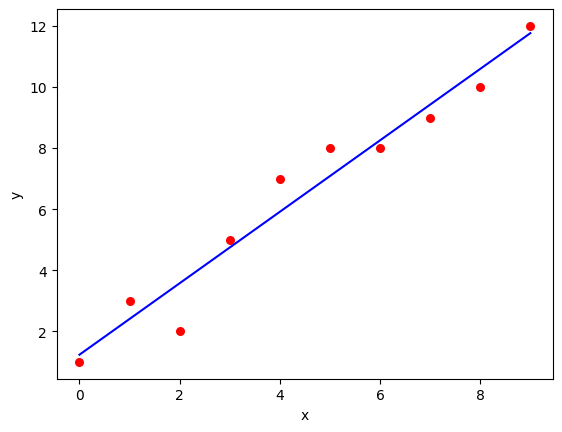

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "r",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "b")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


#6

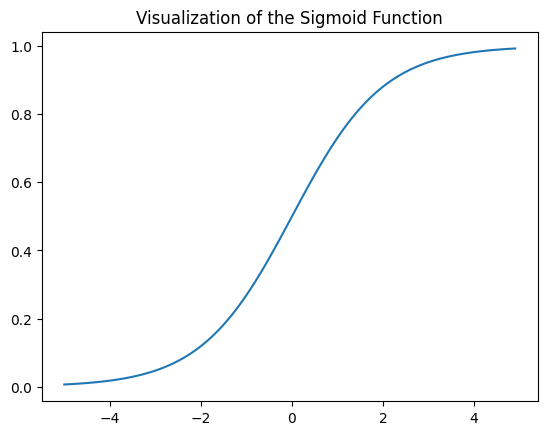

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp( - z))

plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1)))
plt.title('Visualization of the Sigmoid Function')

plt.show()


#7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=150, n_features=4, n_informative=3, n_redundant=0, random_state=32, shuffle=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the K-NN classifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Display the results
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[14  1]
 [ 2 13]]
Accuracy: 0.9


#8

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes Classification model on the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Display the results (confusion matrix and accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))


[[12  2]
 [ 0 11]]
Accuracy: 0.92


#9

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=150, n_features=4, n_informative=3, n_redundant=0, random_state=2)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression Classification model on the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Display the results (confusion matrix and accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[22  2]
 [ 3 18]]
Accuracy: 0.8888888888888888


#10

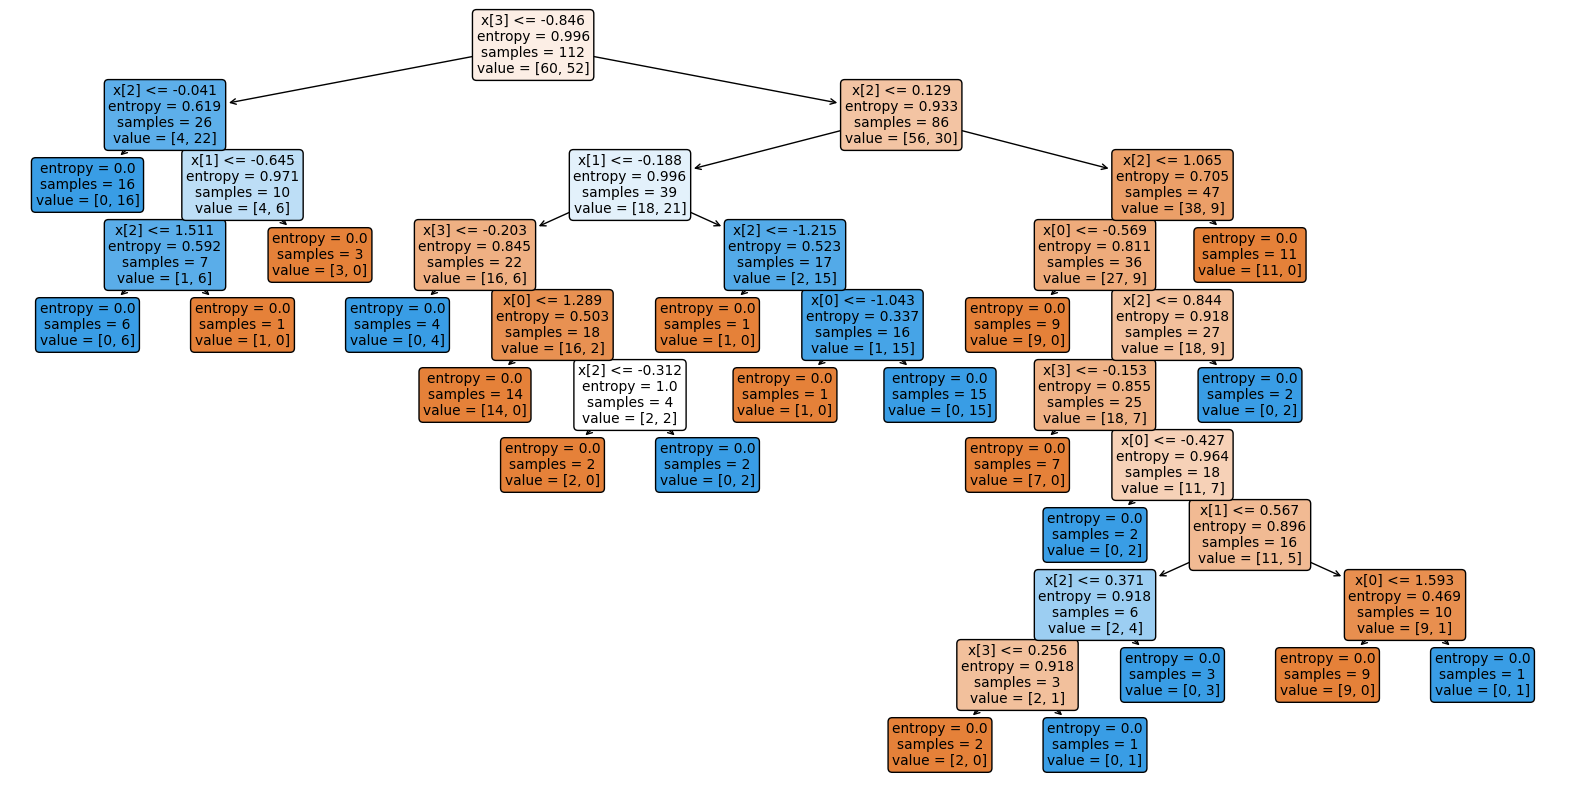

Confusion Matrix:
 [[ 9  5]
 [ 7 17]]
Accuracy: 0.6842105263157895


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=150, n_features=4, n_informative=3, n_redundant=0, random_state=8, shuffle=True)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree Classification model on the Training set
classifier = DecisionTreeClassifier(criterion='entropy', random_state=5)
classifier.fit(X_train, y_train)

# Display the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, rounded=True)
plt.show()

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Display the results (confusion matrix and accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))


#11

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=150, n_features=4, n_informative=3, n_redundant=0, random_state=32, shuffle=True)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the SVM model on the Training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the performance of the model using confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))


Confusion Matrix:
 [[17  3]
 [ 3 15]]
Accuracy: 84.21%


#12

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred))


Confusion Matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Accuracy: 0.9736842105263158


#13


Iteration 1000: Cost 279.8834407501399, Weight 1.3076120828581432, Bias -1.016974332424831
Iteration 2000: Cost 277.6239019036326, Weight 1.2992470083875332, Bias -0.541707450972243


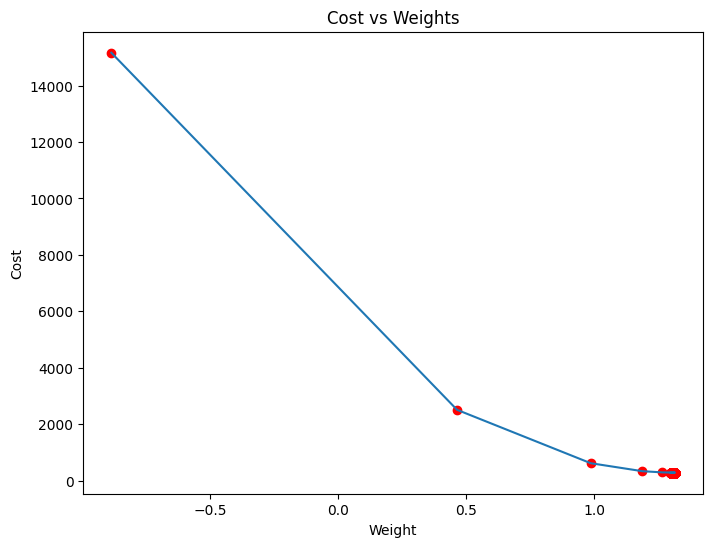

Estimated Weight: 1.2992470083875332
Estimated Bias: -0.541707450972243


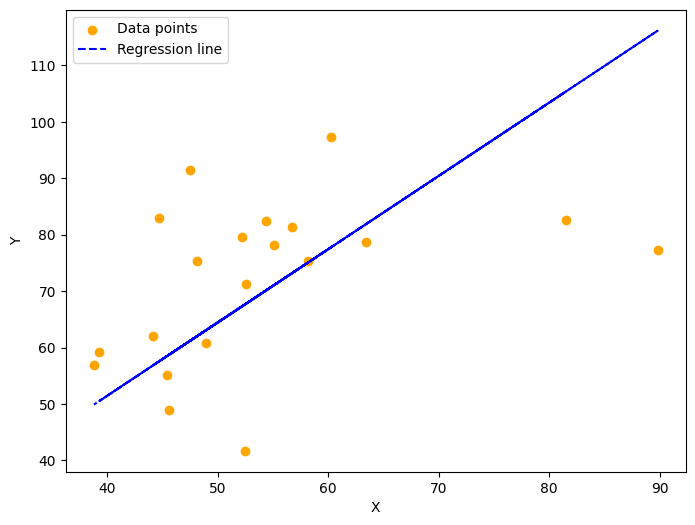

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost

def gradient_descent(x, y, iterations=1000, learning_rate=0.0001, stopping_threshold=1e-6):
    current_weight = np.random.randn()  # Initialize weight randomly
    current_bias = np.random.randn()    # Initialize bias randomly
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):
        y_predicted = current_weight * x + current_bias

        current_cost = mean_squared_error(y, y_predicted)
        costs.append(current_cost)
        weights.append(current_weight)

        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        # Gradient calculation
        weight_derivative = -(2/n) * np.sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * np.sum(y - y_predicted)

        # Update weights and bias
        current_weight = current_weight - learning_rate * weight_derivative
        current_bias = current_bias - learning_rate * bias_derivative

        # Print parameters for each 1000th iteration
        if (i + 1) % 1000 == 0:
            print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    # Plotting cost vs weights
    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias

def main():
    # Data
    X = np.array([52.50234527, 63.42680403, 81.53035803, 47.47563963, 89.81320787,
                  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
                  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([41.70700585, 78.77759598, 82.5623823 , 91.54663223, 77.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight * X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, marker='o', color='orange', label='Data points')
    plt.plot(X, Y_pred, color='blue', linestyle='dashed', label='Regression line')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


#14

Iteration 1: Cost 4613.314246934809, Weight 0.8294161860134117, Bias 0.02330558130709
Iteration 1001: Cost 272.768347238136, Weight 1.2809791846217744, Bias 0.49619025843626685


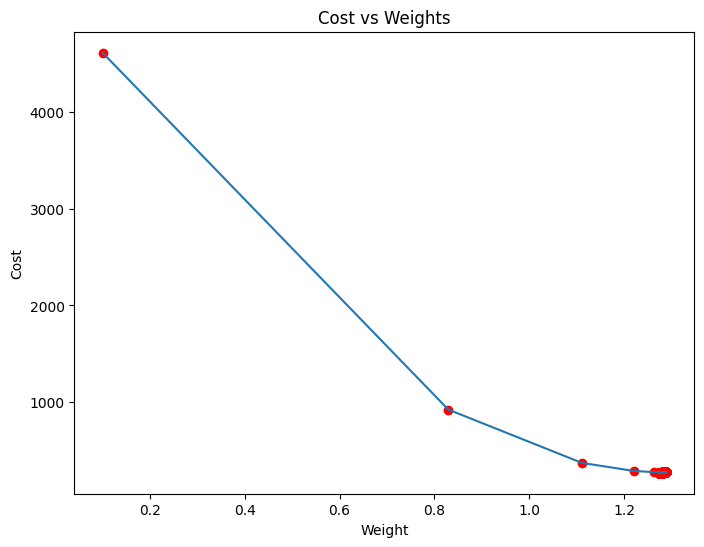

Estimated Weight: 1.272888252198252
Estimated Bias: 0.9558815898740776


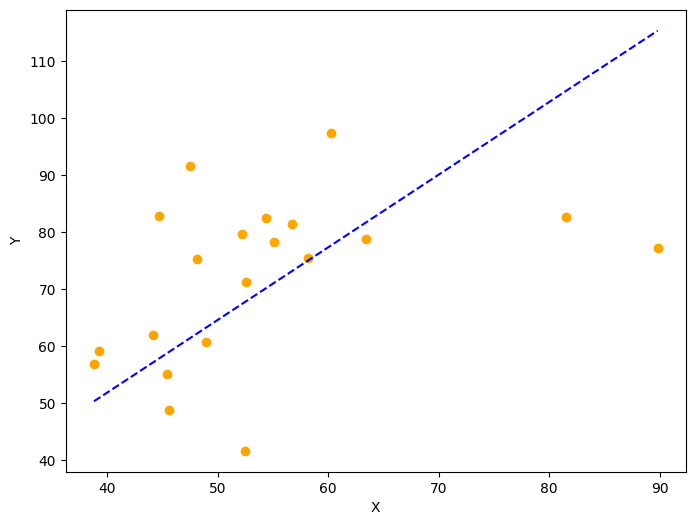

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true - y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
def gradient_descent(x, y, iterations=1000, learning_rate=0.0001, stopping_threshold=1e-6):
    # Initializing weight, bias, learning rate, and iterations
    current_weight = 0.1
    current_bias = 0.01
    n = float(len(x))

    # Lists to store the cost and weights for each iteration
    costs = []
    weights = []
    previous_cost = None

    # Gradient Descent Algorithm
    for i in range(iterations):
        # Making predictions
        y_predicted = (current_weight * x) + current_bias

        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)

        # If the change in cost is less than or equal to stopping_threshold, stop the gradient descent
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        # Append current cost and weight to lists
        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * sum(y - y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        if i % 1000 == 0:
            print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    # Visualizing the weights and cost for all iterations
    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias

def main():
    # Data
    X = np.array([52.50234527, 63.42680403, 81.53035803, 47.47563963, 89.81320787,
                  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
                  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([41.70700585, 78.77759598, 82.5623823 , 91.54663223, 77.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight * X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, marker='o', color='orange')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

if __name__ == "__main__":
    main()